In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Train Data:

In [2]:
chunk_size = 10000  # Adjust based on your memory constraints
chunks = pd.read_csv("GUIDE_Train.csv", chunksize=chunk_size)

# List to hold all chunks
chunk_list = []

# Iterate over each chunk
for chunk in chunks:
    # You can process or filter the chunk here if needed
    chunk_list.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunk_list, ignore_index=True)

## Shape:

In [3]:
df.shape

(9516837, 45)

## Duplicate Removal:

In [4]:
# Identify duplicate rows where all columns match
duplicate_rows = df[df.duplicated()]

# Count the number of such duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows with identical values across all columns: {num_duplicates}")

Number of duplicate rows with identical values across all columns: 22559


In [5]:
# Remove duplicate rows and keep the updated DataFrame in df
df = df.drop_duplicates()

# Verify the updated DataFrame
print(f"DataFrame after removing duplicate rows:\n{df}")


DataFrame after removing duplicate rows:
                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
0         180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1         455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2        1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3        1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4         214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   
...                ...    ...         ...      ...                       ...   
9516832  1056561956622      0          90   496631  2024-06-08T15:26:08.000Z   
9516833  1228360650033     59      196410   748366  2024-06-06T09:40:08.000Z   
9516834   867583395122     44       14117     7425  2024-06-11T22:51:03.000Z   
9516835   395136991850     43         644     8973  2024-05-20T23:01:01.000Z   
9516836   678604833923     16      141721   644106  2024-06-03T23:51:52.000Z   

## Sampling for analysis and Training:

In [6]:
df = df.sample(n=500000, random_state=42)  # Use random_state for reproducibility

print(df)

                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
7327552  1666447312581     70       56091   689498  2024-06-10T18:39:38.000Z   
7768450  1589137902245     29       30622    24058  2024-06-14T23:27:48.000Z   
2559045   231928236459     28      228193   117031  2024-06-16T04:39:17.000Z   
4956177   652835029527    895       23781  1473560  2024-06-16T10:06:06.000Z   
8837109   111669152214      5          31  1056669  2024-06-09T21:49:43.000Z   
...                ...    ...         ...      ...                       ...   
785055   1649267444358      8        4810   266142  2024-06-13T04:56:19.000Z   
8394437   326417519455      4          67      350  2024-05-30T04:53:22.000Z   
2916492   335007451560     28      228058   460465  2024-06-12T10:44:51.000Z   
2029205  1649267445098      2       13845    13514  2024-06-15T01:34:59.000Z   
8632510   755914244170     67        5944    19192  2024-06-09T02:44:21.000Z   

         DetectorId  AlertTitle        

## Understanding the Columns:

In [7]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

### Feature Description:
#### Id - Unique ID for each OrgId-IncidentId pair
#### IncidentId - Organizationally unique incident identifier
#### AlertId - Unique identifier for an alert
#### Timestamp - Time the alert was created
#### DetectorId - Unique ID for the alert generating detector
#### AlertTitle - Title of the alert
#### Category - Category of the alert
#### MitreTechniques - MITRE ATT&CK techniques involved in alert
#### IncidentGrade - SOC grade assigned to the incident
#### ActionGrouped - SOC alert remediation action (high level)
#### ActionGranular - SOC alert remediation action (fine-grain)
#### EntityType - Type of entity involved in the alert
#### EvidenceRole - Role of the evidence in the investigation
#### Roles Additional - metadata on evidence role in alert
#### DeviceId - Unique identifier for the device
#### DeviceName - Name of the device
#### Sha256 - SHA-256 hash of the file
#### IpAddress - IP address involved
#### Url - URL involved
#### AccountSid - On-premises account identifier
#### AccountUpn - Email account identifier
#### AccountObjectId - Entra ID account identifier
#### AccountName - Name of the on-premises account
#### NetworkMessageId - Org-level identifier for email message
#### EmailClusterId - Unique identifier for the email cluster
#### RegistryKey - Registry key involved
#### RegistryValueName - Name of the registry value
#### RegistryValueData - Data of the registry value
#### ApplicationId - Unique identifier for the application
#### ApplicationName - Name of the application
#### OAuthApplicationId - OAuth application identifier
#### ThreatFamily - Malware family associated with a file
#### FileName - Name of the file
#### FolderPath - Path of the file folder
#### ResourceIdName - Name of the Azure resource
#### ResourceType - Type of Azure resource
#### OSFamily - Family of the operating system
#### OSVersion - Version of the operating system
#### AntispamDirection - Direction of the antispam filter
#### SuspicionLevel - Level of suspicion
#### LastVerdict - Final verdict of threat analysis
#### CountryCode - Country code evidence appears in
#### State - State of evidence appears in
#### City - City evidence appears in

## NUll Value Analysis:

In [8]:
df.isnull().sum()

Id                         0
OrgId                      0
IncidentId                 0
AlertId                    0
Timestamp                  0
DetectorId                 0
AlertTitle                 0
Category                   0
MitreTechniques       286995
IncidentGrade           2678
ActionGrouped         497078
ActionGranular        497078
EntityType                 0
EvidenceRole               0
DeviceId                   0
Sha256                     0
IpAddress                  0
Url                        0
AccountSid                 0
AccountUpn                 0
AccountObjectId            0
AccountName                0
DeviceName                 0
NetworkMessageId           0
EmailClusterId        494833
RegistryKey                0
RegistryValueName          0
RegistryValueData          0
ApplicationId              0
ApplicationName            0
OAuthApplicationId         0
ThreatFamily          496143
FileName                   0
FolderPath                 0
ResourceIdName

### Dropping Columns that are 90% or more null valued:

In [9]:
# Drop the specified columns 
df.drop(columns=[
    'ActionGrouped',         
    'ActionGranular',
    'MitreTechniques',       
    'EmailClusterId',
    'ResourceType',        
    'Roles', 
    'ThreatFamily',
    'AntispamDirection'
], inplace=True)

# Display the DataFrame to verify the columns have been dropped
print("DataFrame after dropping specified columns:")
print(df)

DataFrame after dropping specified columns:
                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
7327552  1666447312581     70       56091   689498  2024-06-10T18:39:38.000Z   
7768450  1589137902245     29       30622    24058  2024-06-14T23:27:48.000Z   
2559045   231928236459     28      228193   117031  2024-06-16T04:39:17.000Z   
4956177   652835029527    895       23781  1473560  2024-06-16T10:06:06.000Z   
8837109   111669152214      5          31  1056669  2024-06-09T21:49:43.000Z   
...                ...    ...         ...      ...                       ...   
785055   1649267444358      8        4810   266142  2024-06-13T04:56:19.000Z   
8394437   326417519455      4          67      350  2024-05-30T04:53:22.000Z   
2916492   335007451560     28      228058   460465  2024-06-12T10:44:51.000Z   
2029205  1649267445098      2       13845    13514  2024-06-15T01:34:59.000Z   
8632510   755914244170     67        5944    19192  2024-06-09T02:44:21.000Z

### Incident Grade is our target variable, hence drop rows that are null:

In [10]:
# Group by 'IncidentGrade' and summarize relevant columns
result = (
    df.groupby('IncidentGrade')[['SuspicionLevel', 'LastVerdict', 'Category', 'EvidenceRole']]
    .agg(lambda x: x.value_counts().to_dict())  # Get value counts for each column as dictionaries
    .reset_index()
)

# Display results
print("Analysis for each IncidentGrade category:")
print(result)

# Check rows where 'IncidentGrade' is null and analyze relevant columns
null_incident_grade = df[df['IncidentGrade'].isna()]
null_analysis = {
    'SuspicionLevel': null_incident_grade['SuspicionLevel'].value_counts().to_dict(),
    'LastVerdict': null_incident_grade['LastVerdict'].value_counts().to_dict(),
    'Category': null_incident_grade['Category'].value_counts().to_dict(),
    'EvidenceRole': null_incident_grade['EvidenceRole'].value_counts().to_dict()
}

print("\nAnalysis of rows with null 'IncidentGrade':")
print(null_analysis)

Analysis for each IncidentGrade category:
    IncidentGrade                             SuspicionLevel  \
0  BenignPositive  {'Suspicious': 47295, 'Incriminated': 27}   
1   FalsePositive   {'Suspicious': 11724, 'Incriminated': 2}   
2    TruePositive   {'Suspicious': 16368, 'Incriminated': 5}   

                                         LastVerdict  \
0  {'Suspicious': 45687, 'Malicious': 12916, 'NoT...   
1  {'Suspicious': 11514, 'NoThreatsFound': 3629, ...   
2  {'Suspicious': 16185, 'Malicious': 7269, 'NoTh...   

                                            Category  \
0  {'Exfiltration': 56764, 'InitialAccess': 56278...   
1  {'InitialAccess': 50508, 'Exfiltration': 19434...   
2  {'InitialAccess': 118053, 'SuspiciousActivity'...   

                              EvidenceRole  
0  {'Impacted': 113789, 'Related': 103020}  
1    {'Related': 56262, 'Impacted': 50726}  
2   {'Related': 113693, 'Impacted': 59832}  

Analysis of rows with null 'IncidentGrade':
{'SuspicionLevel': {'Suspi

## Observed Patterns:
### 1. SuspicionLevel
### Null IncidentGrade rows have:
#### Suspicious: 307 occurrences
#### Incriminated: 51 occurrences
#### Compare with other categories:
#### BenignPositive is heavily skewed toward Suspicious (47,295 out of 47,322).
#### FalsePositive is also mainly Suspicious (11,724 out of 11,726).
#### TruePositive shows the same trend but has a slightly higher proportion of Malicious.
### 2. LastVerdict
### Null IncidentGrade rows:
#### Dominated by Suspicious (310 occurrences), with a smaller count for Malicious (74 occurrences).
#### Compare with other categories:
#### BenignPositive and FalsePositive both lean heavily toward Suspicious and NoThreatsFound.
#### TruePositive has a higher count for Malicious, indicating it's more likely to be TruePositive if the verdict is Malicious.
### 3. Category
### Null rows have a wide variety of categories:
#### Dominated by Exfiltration (1,378), SuspiciousActivity (464), and InitialAccess (460).
#### Other categories, such as Ransomware, Discovery, and CommandAndControl, have far fewer occurrences.
#### Compare with other categories:
#### BenignPositive and FalsePositive both show high counts for Exfiltration and InitialAccess, suggesting null rows may align more closely with these.
#### TruePositive has a strong focus on InitialAccess and SuspiciousActivity, with higher counts for more severe categories like Ransomware and Malware.
### 4. EvidenceRole
### Null rows:
#### Dominated by Impacted (2,676 occurrences), with very few Related (2 occurrences).
#### Compare with other categories:
#### BenignPositive and FalsePositive have more balance between Impacted and Related.
#### TruePositive also shows more balance, with slightly higher counts for Related.

### Key Observations:

### Rows with IncidentGrade = NaN are:

#### Dominated by Suspicious in both SuspicionLevel and LastVerdict.
#### Have a wide spread across Category, though Exfiltration and InitialAccess dominate.
#### Almost entirely Impacted in EvidenceRole.

### Null rows are not perfectly aligned with any single IncidentGrade category, though they share characteristics with BenignPositive and FalsePositive:

#### Suspicious levels are similar to BenignPositive and FalsePositive.
#### Category distribution (Exfiltration, InitialAccess) is similar to both BenignPositive and FalsePositive.
#### EvidenceRole (Impacted) is heavily skewed compared to any other category.

### Likelihood of belonging to TruePositive is low.

#### Null rows lack the strong presence of Malicious verdicts and critical categories like Ransomware and Malware, which are more typical of TruePositive.

### Assign Nulls Based on Probabilistic Patterns
### Assign nulls to BenignPositive or FalsePositive based on probabilities derived from the dataset:
#### For example:
#### If SuspicionLevel = Suspicious and Category = Exfiltration or InitialAccess → Assign to BenignPositive.
#### If SuspicionLevel = Suspicious and LastVerdict = NoThreatsFound → Assign to FalsePositive.

In [11]:
import pandas as pd
import numpy as np

# Example conditions and assignments for filling IncidentGrade
def assign_incident_grade(row):
    # If SuspicionLevel is 'Suspicious' and Category is 'Exfiltration' or 'InitialAccess'
    if row['SuspicionLevel'] == 'Suspicious' and row['Category'] in ['Exfiltration', 'InitialAccess']:
        return 'BenignPositive'
    # If SuspicionLevel is 'Suspicious' and LastVerdict is 'NoThreatsFound'
    elif row['SuspicionLevel'] == 'Suspicious' and row['LastVerdict'] == 'NoThreatsFound':
        return 'FalsePositive'
    # If no clear pattern is found, return NaN (you can adjust this to a default value if required)
    return np.nan

# Apply the function to fill null values in IncidentGrade
df['IncidentGrade'] = df.apply(
    lambda row: assign_incident_grade(row) if pd.isnull(row['IncidentGrade']) else row['IncidentGrade'],
    axis=1
)

# Optional: Drop any remaining NaN values in IncidentGrade if they do not match patterns
df = df.dropna(subset=['IncidentGrade'])

# Display the updated DataFrame
print(df['IncidentGrade'].value_counts())


IncidentGrade
BenignPositive    216825
TruePositive      173525
FalsePositive     106988
Name: count, dtype: int64


In [14]:
df.isnull().sum()

Id                         0
OrgId                      0
IncidentId                 0
AlertId                    0
Timestamp                  0
DetectorId                 0
AlertTitle                 0
Category                   0
IncidentGrade              0
EntityType                 0
EvidenceRole               0
DeviceId                   0
Sha256                     0
IpAddress                  0
Url                        0
AccountSid                 0
AccountUpn                 0
AccountObjectId            0
AccountName                0
DeviceName                 0
NetworkMessageId           0
RegistryKey                0
RegistryValueName          0
RegistryValueData          0
ApplicationId              0
ApplicationName            0
OAuthApplicationId         0
FileName                   0
FolderPath                 0
ResourceIdName             0
OSFamily                   0
OSVersion                  0
SuspicionLevel        421901
LastVerdict           380411
CountryCode   

In [15]:
df['SuspicionLevel'].unique()

array(['Suspicious', nan, 'Incriminated'], dtype=object)

In [16]:
df['LastVerdict'].unique()

array(['Suspicious', nan, 'Malicious', 'NoThreatsFound',
       'DomainPII_50d8b4a941c26b89482c94ab324b5a274f9ced66',
       'DomainPII_9207384283ce115db5a590dd9ca5de21e5e99df2'], dtype=object)

In [17]:
# Fill null values with 'Unknown' or another placeholder
df['SuspicionLevel'].fillna('Unknown', inplace=True)
df['LastVerdict'].fillna('No Verdict', inplace=True)

<ipython-input-17-f71a3cec5a3b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SuspicionLevel'].fillna('Unknown', inplace=True)
<ipython-input-17-f71a3cec5a3b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [18]:
# Find the unique values and their counts in the 'LastVerdict' column
last_verdict_counts = df['LastVerdict'].value_counts(dropna=False)

# Display the counts
print("Unique values in 'LastVerdict' and their counts:")
print(last_verdict_counts)

Unique values in 'LastVerdict' and their counts:
LastVerdict
No Verdict                                            380411
Suspicious                                             73402
Malicious                                              22892
NoThreatsFound                                         20619
DomainPII_50d8b4a941c26b89482c94ab324b5a274f9ced66         9
DomainPII_9207384283ce115db5a590dd9ca5de21e5e99df2         5
Name: count, dtype: int64


In [19]:
# Drop rows where 'LastVerdict' contains the specified values
values_to_drop = [
    'DomainPII_50d8b4a941c26b89482c94ab324b5a274f9ced66',
    'DomainPII_9207384283ce115db5a590dd9ca5de21e5e99df2'
]

# Filter the DataFrame to exclude these values
df = df[~df['LastVerdict'].isin(values_to_drop)]

# Display the updated DataFrame
print(df['LastVerdict'].value_counts())


LastVerdict
No Verdict        380411
Suspicious         73402
Malicious          22892
NoThreatsFound     20619
Name: count, dtype: int64


In [20]:
df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
SuspicionLevel        0
LastVerdict           0
CountryCode           0
State                 0
City                  0
dtype: int64

In [21]:
df.shape

(497324, 37)

## Data Pre-Processing:

### Dropping Pure Identifier Columns:

In [22]:
df.drop(columns=[
    'Id',         
    'OrgId',
    'IncidentId',       
    'AlertId',
    'DetectorId',        
    'IpAddress', 
    'Url',
    'AccountSid',
    'AccountUpn',
    'AccountObjectId',
    'AccountName',
    'NetworkMessageId',
    'ApplicationId'
], inplace=True)

# Display the DataFrame to verify the columns have been dropped
print("DataFrame after dropping specified columns:")
print(df)

DataFrame after dropping specified columns:
                        Timestamp  AlertTitle            Category  \
7327552  2024-06-10T18:39:38.000Z         298             Malware   
7768450  2024-06-14T23:27:48.000Z        1084  SuspiciousActivity   
2559045  2024-06-16T04:39:17.000Z          11       InitialAccess   
4956177  2024-06-16T10:06:06.000Z          23       InitialAccess   
8837109  2024-06-09T21:49:43.000Z           0       InitialAccess   
...                           ...         ...                 ...   
785055   2024-06-13T04:56:19.000Z           4  SuspiciousActivity   
8394437  2024-05-30T04:53:22.000Z           7       InitialAccess   
2916492  2024-06-12T10:44:51.000Z           5       InitialAccess   
2029205  2024-06-15T01:34:59.000Z          13        Exfiltration   
8632510  2024-06-09T02:44:21.000Z           1       InitialAccess   

          IncidentGrade         EntityType EvidenceRole  DeviceId  Sha256  \
7327552   FalsePositive                Url      Re

In [23]:
df.columns

Index(['Timestamp', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'DeviceName', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

## Feature Engineering:

#### TIME STAMP:

In [24]:
# Time Stamp:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
# Basic time features
df['hour'] = df['Timestamp'].dt.hour
df['day'] = df['Timestamp'].dt.day
df['weekday'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year
    
# Derived features
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df['is_business_hours'] = (
(df['hour'] >= 9) & 
(df['hour'] < 17) & 
(df['weekday'] < 5)
).astype(int)
    
# Time periods
df['time_period'] = pd.cut(
df['hour'],
bins=[0, 6, 12, 18, 24],
labels=['night', 'morning', 'afternoon', 'evening'],
include_lowest=True
)

In [25]:
df.head()

,Timestamp,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,DeviceName,RegistryKey,...,State,City,hour,day,weekday,month,year,is_weekend,is_business_hours,time_period
7327552,2024-06-10 18:39:38+00:00,298,Malware,FalsePositive,Url,Related,98799,138268,153085,1631,...,1445,10630,18,10,0,6,2024,0,0,afternoon
7768450,2024-06-14 23:27:48+00:00,1084,SuspiciousActivity,BenignPositive,Machine,Impacted,98799,138268,8616,1631,...,1445,10630,23,14,4,6,2024,0,0,evening
2559045,2024-06-16 04:39:17+00:00,11,InitialAccess,TruePositive,MailMessage,Related,98799,138268,153085,1631,...,1445,10630,4,16,6,6,2024,1,0,night
4956177,2024-06-16 10:06:06+00:00,23,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,153085,1631,...,1445,10630,10,16,6,6,2024,1,0,morning
8837109,2024-06-09 21:49:43+00:00,0,InitialAccess,TruePositive,CloudLogonSession,Related,98799,138268,153085,1631,...,1445,10630,21,9,6,6,2024,1,0,evening


In [26]:
df.columns

Index(['Timestamp', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'DeviceName', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'hour', 'day', 'weekday', 'month', 'year',
       'is_weekend', 'is_business_hours', 'time_period'],
      dtype='object')

In [27]:
df.drop(columns='Timestamp',inplace=True)

In [28]:
df.to_csv("for_EDA_before_encoding.csv") # before encoding and feature engineeering.

### Alert Title:

In [29]:
# Calculate the proportions for each class in each AlertTitle
title_severity = df.groupby('AlertTitle')['IncidentGrade'].value_counts(normalize=True).unstack(fill_value=0)

# Map these proportions to the original dataframe using the `apply` method:
# Each `AlertTitle` will map to its corresponding proportions for each class
df[['AT_TruePositiveProportion', 'AT_FalsePositiveProportion', 'AT_BenignPositiveProportion']] = df['AlertTitle'].apply(lambda x: title_severity.loc[x])

In [30]:
df.columns

Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'DeviceName', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'OAuthApplicationId',
       'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'hour',
       'day', 'weekday', 'month', 'year', 'is_weekend', 'is_business_hours',
       'time_period', 'AT_TruePositiveProportion',
       'AT_FalsePositiveProportion', 'AT_BenignPositiveProportion'],
      dtype='object')

In [32]:
df.drop(columns='AlertTitle', inplace=True)

## Location:

<ipython-input-34-f12cb81eb023>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incident_counts.index, y=incident_counts.values, palette='viridis')


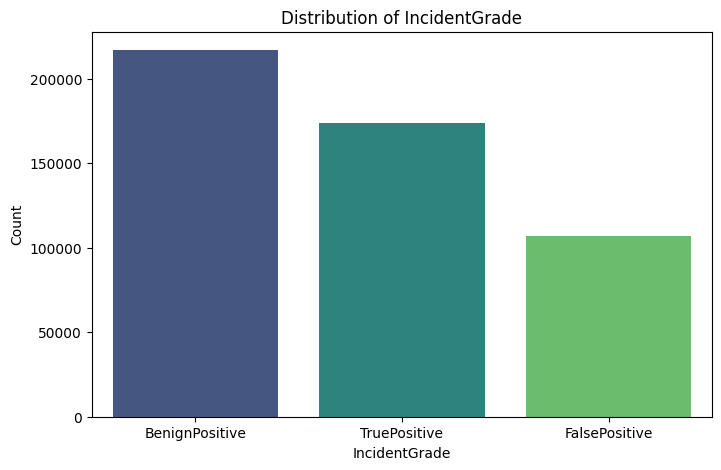

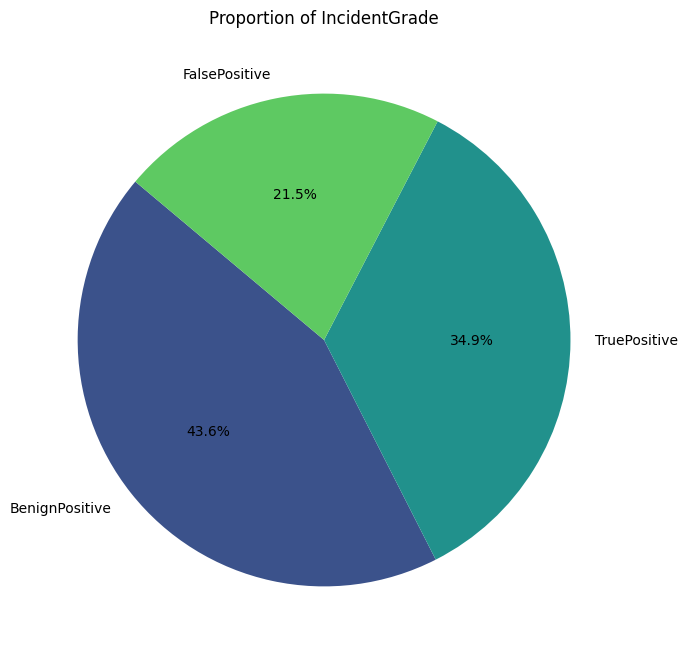

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of 'IncidentGrade' values
incident_counts = df['IncidentGrade'].value_counts()

# 1. Bar Chart for 'IncidentGrade' Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=incident_counts.index, y=incident_counts.values, palette='viridis')
plt.title('Distribution of IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

# 2. Pie Chart for 'IncidentGrade' Proportion
plt.figure(figsize=(8, 8))
plt.pie(incident_counts, labels=incident_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(incident_counts)))
plt.title('Proportion of IncidentGrade')
plt.show()

### Adjusted Weights Using Inverse Proportions
#### Using the given class proportions:

#### TruePositive: 34.9% (0.349)
#### FalsePositive: 21.5% (0.215)
#### BenignPositive: 43.6% (0.436)
#### The weights for each class are calculated as:

#### Weight = 1/Class Proportion

In [35]:
# Step 1: Create the Location Hierarchy (CountryCode_State_City)
df['location'] = df['CountryCode'].astype(str) + '_' + df['State'].astype(str) + '_' + df['City'].astype(str)

# Step 2: Calculate the proportions for each class in each location
location_severity = df.groupby('location')['IncidentGrade'].value_counts(normalize=True).unstack(fill_value=0)

# Step 3: Map these proportions to the original dataframe
df[['Loc_TruePositiveProportion', 'Loc_FalsePositiveProportion', 'Loc_BenignPositiveProportion']] = df['location'].apply(lambda x: location_severity.loc[x])

# Inverse class weights based on proportions
class_weights = {
    'TruePositive': 2.87,
    'FalsePositive': 4.65,
    'BenignPositive': 2.29
}

df['location_risk_score'] = df['location'].apply(lambda x: sum(location_severity.loc[x] * [class_weights[col] for col in location_severity.columns]))

# Optional: Fill any missing values with 0 for locations that don't have a recorded incident grade distribution
df['location_risk_score'] = df['location_risk_score'].fillna(0)

In [36]:
df.columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'DeviceName', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'OAuthApplicationId',
       'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'hour',
       'day', 'weekday', 'month', 'year', 'is_weekend', 'is_business_hours',
       'time_period', 'AT_TruePositiveProportion',
       'AT_FalsePositiveProportion', 'AT_BenignPositiveProportion', 'location',
       'Loc_TruePositiveProportion', 'Loc_FalsePositiveProportion',
       'Loc_BenignPositiveProportion', 'location_risk_score'],
      dtype='object')

In [37]:
df.drop(columns=['CountryCode', 'State', 'City'], inplace=True)

### FileName, FolderPath, DeviceID:

In [38]:
# Create risk scores and proportions for IncidentGrade and SuspicionLevel for FileName and FolderPath
for col in ['FileName', 'FolderPath']:
    # Calculate proportions for each class in IncidentGrade and store in a DataFrame
    risk_scores = df.groupby(col)['IncidentGrade'].value_counts(normalize=True).unstack(fill_value=0)
    
    # Map each proportion to the original DataFrame for IncidentGrade classes
    df[[f'{col.lower()}_true_positive', f'{col.lower()}_false_positive', f'{col.lower()}_benign_positive']] = \
        df[col].apply(lambda x: risk_scores.reindex([x]).iloc[0][['TruePositive', 'FalsePositive', 'BenignPositive']].fillna(0))
    
    # Calculate proportions for SuspicionLevel and store in a DataFrame
    suspicion_rates = df.groupby(col)['SuspicionLevel'].value_counts(normalize=True).unstack(fill_value=0)
    
    # Map each proportion to the original DataFrame for SuspicionLevel levels
    df[[f'{col.lower()}_suspicious', f'{col.lower()}_incriminated', f'{col.lower()}_suspicion_unknown']] = \
        df[col].apply(lambda x: suspicion_rates.reindex([x]).iloc[0][['Suspicious', 'Incriminated', 'Unknown']].fillna(0))

# Calculate device risk metrics for IncidentGrade and SuspicionLevel
device_metrics = df.groupby('DeviceId').agg({
    'IncidentGrade': lambda x: x.value_counts(normalize=True).reindex(['TruePositive', 'FalsePositive', 'BenignPositive'], fill_value=0),
    'SuspicionLevel': lambda x: x.value_counts(normalize=True).reindex(['Suspicious', 'Incriminated', 'Unknown'], fill_value=0)
})

# Extract IncidentGrade proportions for each class and map them back to the DataFrame
df[['device_true_positive', 'device_false_positive', 'device_benign_positive']] = \
    df['DeviceId'].apply(lambda x: pd.Series(device_metrics['IncidentGrade'].loc[x]).fillna(0))

# Extract SuspicionLevel proportions for each level and map them back to the DataFrame
df[['device_suspicious', 'device_incriminated', 'device_suspicion_unknown']] = \
    df['DeviceId'].apply(lambda x: pd.Series(device_metrics['SuspicionLevel'].loc[x]).fillna(0))

# Fill any remaining missing values (if any)
df.fillna({
    'device_true_positive': 0, 'device_false_positive': 0, 'device_benign_positive': 0,
    'device_suspicious': 0,  'device_incriminated': 0, 'device_suspicion_unknown': 0
}, inplace=True)


In [39]:
df.columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'DeviceName', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'OAuthApplicationId',
       'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion',
       'SuspicionLevel', 'LastVerdict', 'hour', 'day', 'weekday', 'month',
       'year', 'is_weekend', 'is_business_hours', 'time_period',
       'AT_TruePositiveProportion', 'AT_FalsePositiveProportion',
       'AT_BenignPositiveProportion', 'location', 'Loc_TruePositiveProportion',
       'Loc_FalsePositiveProportion', 'Loc_BenignPositiveProportion',
       'location_risk_score', 'filename_true_positive',
       'filename_false_positive', 'filename_benign_positive',
       'filename_suspicious', 'filename_incriminated',
       'filename_suspicion_unknown', 'folderpath_true_positive',
       'folderpath_false_positive', 'folderpath_benign_positive',
       'folderpath_suspicious', 'folderpath_incrim

In [40]:
df.head()

,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,DeviceName,RegistryKey,RegistryValueName,RegistryValueData,...,folderpath_benign_positive,folderpath_suspicious,folderpath_incriminated,folderpath_suspicion_unknown,device_true_positive,device_false_positive,device_benign_positive,device_suspicious,device_incriminated,device_suspicion_unknown
7327552,Malware,FalsePositive,Url,Related,98799,138268,153085,1631,635,860,...,0.410481,0.117628,0.000015,0.882356,0.355577,0.216378,0.428045,0.125523,0.000071,0.874406
7768450,SuspiciousActivity,BenignPositive,Machine,Impacted,98799,138268,8616,1631,635,860,...,0.410481,0.117628,0.000015,0.882356,0.355577,0.216378,0.428045,0.125523,0.000071,0.874406
2559045,InitialAccess,TruePositive,MailMessage,Related,98799,138268,153085,1631,635,860,...,0.410481,0.117628,0.000015,0.882356,0.355577,0.216378,0.428045,0.125523,0.000071,0.874406
4956177,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,153085,1631,635,860,...,0.410481,0.117628,0.000015,0.882356,0.355577,0.216378,0.428045,0.125523,0.000071,0.874406
8837109,InitialAccess,TruePositive,CloudLogonSession,Related,98799,138268,153085,1631,635,860,...,0.410481,0.117628,0.000015,0.882356,0.355577,0.216378,0.428045,0.125523,0.000071,0.874406


In [41]:
df.drop(columns=['DeviceId', 'DeviceName', 'FileName', 'FolderPath'], inplace=True)

### ONE HOT ENCODING Cat. Columns:

In [42]:
df = pd.get_dummies(df, columns=['Category', 'OAuthApplicationId', 'OSFamily', 'SuspicionLevel', 'LastVerdict'])

In [43]:
df.columns

Index(['IncidentGrade', 'EntityType', 'EvidenceRole', 'Sha256', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationName',
       'ResourceIdName', 'OSVersion',
       ...
       'OSFamily_2', 'OSFamily_3', 'OSFamily_5', 'SuspicionLevel_Incriminated',
       'SuspicionLevel_Suspicious', 'SuspicionLevel_Unknown',
       'LastVerdict_Malicious', 'LastVerdict_No Verdict',
       'LastVerdict_NoThreatsFound', 'LastVerdict_Suspicious'],
      dtype='object', length=148)

### Mapping Target Variable:

In [44]:
import pandas as pd

# Sample grade_mapping dictionary
grade_mapping = {
    'FalsePositive': 0,   # Not a real threat
    'BenignPositive': 1,  # Real but not malicious
    'TruePositive': 2     # Real and malicious
}

# Apply grade_mapping to the 'IncidentGrade' column
df['IncidentGrade'] = df['IncidentGrade'].map(grade_mapping)

# Verify the transformation
print(df['IncidentGrade'].head())

7327552    0
7768450    1
2559045    2
4956177    1
8837109    2
Name: IncidentGrade, dtype: int64


### Target Encoding High Cardinal Columns:

In [45]:
import pandas as pd
import category_encoders as ce

# Ensure that `IncidentGrade` is in Series format
y = df['IncidentGrade']

# Instantiate the target encoder
target_encoder = ce.TargetEncoder(cols=['EntityType', 'OSVersion', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationName'])

# Fit and transform the columns with the target encoder using `y` as a Series
df_encoded = target_encoder.fit_transform(df, y)

# Assign the transformed columns back to the original `df`
for col in ['EntityType', 'OSVersion', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationName']:
    df[col] = df_encoded[col]

print(df)

         IncidentGrade  EntityType EvidenceRole  Sha256  RegistryKey  \
7327552              0    1.099481      Related  138268     1.135354   
7768450              1    0.770566     Impacted  138268     1.135354   
2559045              2    0.921245      Related  138268     1.135354   
4956177              1    1.098595     Impacted  138268     1.135354   
8837109              2    1.182732      Related  138268     1.135354   
...                ...         ...          ...     ...          ...   
785055               2    0.770566     Impacted  138268     1.135354   
8394437              0    0.770566     Impacted  138268     1.135354   
2916492              2    1.144725      Related  138268     1.135354   
2029205              1    0.921245     Impacted  138268     1.135354   
8632510              1    1.144725      Related  138268     1.135354   

         RegistryValueName  RegistryValueData  ApplicationName  \
7327552           1.133898           1.133981         1.135725   
776

### Binary Encoding - EvidenceRole

In [46]:
import category_encoders as ce

# Instantiate the BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['EvidenceRole'])

# Fit and transform the 'EvidenceRole' column
df_binary_encoded = binary_encoder.fit_transform(df)

# Assign the binary encoded columns back to the original DataFrame
df = pd.concat([df.drop(columns=['EvidenceRole']), df_binary_encoded], axis=1)

# Verify the transformation
print(df.head())

         IncidentGrade  EntityType  Sha256  RegistryKey  RegistryValueName  \
7327552              0    1.099481  138268     1.135354           1.133898   
7768450              1    0.770566  138268     1.135354           1.133898   
2559045              2    0.921245  138268     1.135354           1.133898   
4956177              1    1.098595  138268     1.135354           1.133898   
8837109              2    1.182732  138268     1.135354           1.133898   

         RegistryValueData  ApplicationName  ResourceIdName  OSVersion  hour  \
7327552           1.133981         1.135725            3586   1.137676    18   
7768450           1.133981         1.135725            3586   1.137676    23   
2559045           1.133981         1.135725            3586   1.137676     4   
4956177           1.133981         1.135725            3586   1.137676    10   
8837109           1.133981         1.135725            3586   1.137676    21   

         ...  OSFamily_2  OSFamily_3  OSFamily_5  

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497324 entries, 7327552 to 8632510
Columns: 296 entries, IncidentGrade to LastVerdict_Suspicious
dtypes: bool(208), category(2), float64(62), int32(10), int64(12), object(2)
memory usage: 410.7+ MB


### Sha256:

In [52]:
print(df['Sha256'].shape)

(497324, 2)


In [54]:
# Assuming 'Sha256' or 'Sha256_combined' is now the single column to use
hash_counts = df['Sha256'].value_counts(normalize=True)
df['hash_frequency'] = df['Sha256'].map(hash_counts)

In [55]:
df.drop(columns='Sha256', inplace=True)

In [56]:
df.drop(columns='ResourceIdName', inplace=True)

### Removing Duplicated Columns:

In [53]:
# If you only need the first 'Sha256' column
df = df.loc[:, ~df.columns.duplicated()]

In [51]:
print(df.columns[df.columns.duplicated()])

Index(['IncidentGrade', 'EntityType', 'Sha256', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationName',
       'ResourceIdName', 'OSVersion', 'hour',
       ...
       'OSFamily_2', 'OSFamily_3', 'OSFamily_5', 'SuspicionLevel_Incriminated',
       'SuspicionLevel_Suspicious', 'SuspicionLevel_Unknown',
       'LastVerdict_Malicious', 'LastVerdict_No Verdict',
       'LastVerdict_NoThreatsFound', 'LastVerdict_Suspicious'],
      dtype='object', length=147)


In [57]:
# This will show the names of duplicated columns if any
duplicate_columns = df.columns[df.columns.duplicated()].tolist()

if duplicate_columns:
    print("Duplicated columns:", duplicate_columns)
else:
    print("No duplicated columns found.")

No duplicated columns found.


In [58]:
df.columns

Index(['IncidentGrade', 'EntityType', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'OSVersion', 'hour', 'day',
       'weekday',
       ...
       'SuspicionLevel_Incriminated', 'SuspicionLevel_Suspicious',
       'SuspicionLevel_Unknown', 'LastVerdict_Malicious',
       'LastVerdict_No Verdict', 'LastVerdict_NoThreatsFound',
       'LastVerdict_Suspicious', 'EvidenceRole_0', 'EvidenceRole_1',
       'hash_frequency'],
      dtype='object', length=148)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497324 entries, 7327552 to 8632510
Columns: 148 entries, IncidentGrade to hash_frequency
dtypes: bool(104), category(1), float64(32), int32(5), int64(5), object(1)
memory usage: 207.3+ MB


In [60]:
# Convert all True/False values to binary (1/0) for all columns in the DataFrame
df = df.replace({True: 1, False: 0})

# Verify the transformation
print(df.head())

<ipython-input-60-3976cb52db72>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


         IncidentGrade  EntityType  RegistryKey  RegistryValueName  \
7327552              0    1.099481     1.135354           1.133898   
7768450              1    0.770566     1.135354           1.133898   
2559045              2    0.921245     1.135354           1.133898   
4956177              1    1.098595     1.135354           1.133898   
8837109              2    1.182732     1.135354           1.133898   

         RegistryValueData  ApplicationName  OSVersion  hour  day  weekday  \
7327552           1.133981         1.135725   1.137676    18   10        0   
7768450           1.133981         1.135725   1.137676    23   14        4   
2559045           1.133981         1.135725   1.137676     4   16        6   
4956177           1.133981         1.135725   1.137676    10   16        6   
8837109           1.133981         1.135725   1.137676    21    9        6   

         ...  SuspicionLevel_Incriminated  SuspicionLevel_Suspicious  \
7327552  ...                          

## DataType Analysis:

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497324 entries, 7327552 to 8632510
Columns: 148 entries, IncidentGrade to hash_frequency
dtypes: category(1), float64(32), int32(5), int64(109), object(1)
memory usage: 552.5+ MB


In [62]:
# Get columns with object data types
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the columns with object data types
print(object_columns)

['location']


In [63]:
# Select the columns of interest
columns_of_interest = ['location']

# Print samples from these columns
sample_data = df[columns_of_interest].sample(10)  # Adjust the number 10 to print more or fewer samples
print(sample_data)

               location
1067921  242_1445_10630
8162179  242_1445_10630
2147244  242_1445_10630
9031115  242_1445_10630
6126667  242_1445_10630
2689995  242_1445_10630
5271297           1_0_0
5096724  242_1445_10630
457569   242_1445_10630
5206372  242_1445_10630


In [64]:
df.drop(columns='location', inplace=True)

In [65]:
grade_mapping = {
    'night': 0,   
    'morning': 1,  
    'afternoon': 2,
    'evening': 3 
}

# Apply grade_mapping to the 'time_period' column
df['time_period'] = df['time_period'].map(grade_mapping)

# Verify the transformation
print(df['time_period'].head())

7327552    2
7768450    3
2559045    0
4956177    1
8837109    3
Name: time_period, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [66]:
# Convert the 'time_period' column to integer type
df['time_period'] = df['time_period'].astype(int)

# Check the datatype to confirm
print(df['time_period'].dtype)

int64


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497324 entries, 7327552 to 8632510
Columns: 147 entries, IncidentGrade to hash_frequency
dtypes: float64(32), int32(5), int64(110)
memory usage: 552.1 MB


### All Set to Training.

In [68]:
## Feature Selection:

In [69]:
df_feature = df.copy()
df_feature

,IncidentGrade,EntityType,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OSVersion,hour,day,weekday,...,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,SuspicionLevel_Unknown,LastVerdict_Malicious,LastVerdict_No Verdict,LastVerdict_NoThreatsFound,LastVerdict_Suspicious,EvidenceRole_0,EvidenceRole_1,hash_frequency
7327552,0,1.099481,1.135354,1.133898,1.133981,1.135725,1.137676,18,10,0,...,0,1,0,0,0,0,1,0,1,0.922891
7768450,1,0.770566,1.135354,1.133898,1.133981,1.135725,1.137676,23,14,4,...,0,0,1,0,1,0,0,1,0,0.922891
2559045,2,0.921245,1.135354,1.133898,1.133981,1.135725,1.137676,4,16,6,...,0,0,1,0,1,0,0,0,1,0.922891
4956177,1,1.098595,1.135354,1.133898,1.133981,1.135725,1.137676,10,16,6,...,0,0,1,0,1,0,0,1,0,0.922891
8837109,2,1.182732,1.135354,1.133898,1.133981,1.135725,1.137676,21,9,6,...,0,0,1,0,1,0,0,0,1,0.922891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785055,2,0.770566,1.135354,1.133898,1.133981,1.135725,1.137676,4,13,3,...,0,1,0,0,0,0,1,1,0,0.922891
8394437,0,0.770566,1.135354,1.133898,1.133981,1.135725,1.137676,4,30,3,...,0,0,1,0,1,0,0,1,0,0.922891
2916492,2,1.144725,1.135354,1.133898,1.133981,1.135725,1.137676,10,12,2,...,0,0,1,0,0,1,0,0,1,0.922891
2029205,1,0.921245,1.135354,1.133898,1.133981,1.135725,1.137676,1,15,5,...,0,0,1,0,1,0,0,1,0,0.922891


### Based on Correlation:

In [70]:
import pandas as pd

# Calculate correlation matrix for numerical columns
numeric_df = df_feature.select_dtypes(include='number')
correlation_matrix = numeric_df.corr().abs()  # Take absolute value for simplicity

# Find pairs of columns with correlation greater than 0.7 (excluding self-correlation)
high_corr_pairs = (
    correlation_matrix.where((correlation_matrix > 0.7) & (correlation_matrix < 1))
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
    .sort_values(by='Correlation', ascending=False)
)

print("Highly correlated column pairs with correlation greater than 0.7:")
print(high_corr_pairs)

Highly correlated column pairs with correlation greater than 0.7:
                       Feature1                      Feature2  Correlation
51     device_suspicion_unknown             device_suspicious     1.000000
43            device_suspicious      device_suspicion_unknown     1.000000
66    SuspicionLevel_Suspicious        SuspicionLevel_Unknown     0.999734
69       SuspicionLevel_Unknown     SuspicionLevel_Suspicious     0.999734
36        folderpath_suspicious  folderpath_suspicion_unknown     0.999541
..                          ...                           ...          ...
11  AT_BenignPositiveProportion     AT_TruePositiveProportion     0.716469
57                   OSFamily_0           device_incriminated     0.713620
48          device_incriminated                    OSFamily_0     0.713620
19     filename_benign_positive        filename_true_positive     0.704717
16       filename_true_positive      filename_benign_positive     0.704717

[78 rows x 3 columns]


### Based on MI Score:

In [71]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Assuming 'target' is your target variable
# Encode target if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(df_feature['IncidentGrade'])

# Calculate MI scores for categorical features
mi_scores = mutual_info_classif(df_feature.select_dtypes(include='number'), y_encoded)

# Create a DataFrame to show scores per feature
mi_df = pd.DataFrame({'Feature': df_feature.select_dtypes(include='number').columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display top features by MI Score
print("Top Features by Mutual Information:")
print(mi_df)

Top Features by Mutual Information:
                         Feature  MI Score
0                  IncidentGrade  1.106417
15     AT_TruePositiveProportion  0.487832
16    AT_FalsePositiveProportion  0.441654
17   AT_BenignPositiveProportion  0.401493
1                     EntityType  0.110381
..                           ...       ...
115       OAuthApplicationId_537  0.000000
118       OAuthApplicationId_593  0.000000
119       OAuthApplicationId_597  0.000000
120       OAuthApplicationId_599  0.000000
137  SuspicionLevel_Incriminated  0.000000

[147 rows x 2 columns]


In [72]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Now print the entire DataFrame of MI scores
print("Top Features by Mutual Information:")
print(mi_df)

Top Features by Mutual Information:
                          Feature  MI Score
0                   IncidentGrade  1.106417
15      AT_TruePositiveProportion  0.487832
16     AT_FalsePositiveProportion  0.441654
17    AT_BenignPositiveProportion  0.401493
1                      EntityType  0.110381
21            location_risk_score  0.106872
19    Loc_FalsePositiveProportion  0.105096
24       filename_benign_positive  0.101435
50         Category_InitialAccess  0.096785
20   Loc_BenignPositiveProportion  0.090487
18     Loc_TruePositiveProportion  0.086057
22         filename_true_positive  0.081455
36         device_benign_positive  0.079184
30     folderpath_benign_positive  0.077585
23        filename_false_positive  0.077157
29      folderpath_false_positive  0.076537
34           device_true_positive  0.071996
28       folderpath_true_positive  0.066037
33   folderpath_suspicion_unknown  0.060767
27     filename_suspicion_unknown  0.060726
35          device_false_positive  0.059

In [73]:
df.to_csv("to_train_fully_encocded.csv")

## TESTING DATA PREPARATION:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

chunk_size = 10000  # Adjust based on your memory constraints
chunks = pd.read_csv("GUIDE_Test.csv", chunksize=chunk_size)

# List to hold all chunks
chunk_list = []

# Iterate over each chunk
for chunk in chunks:
    # You can process or filter the chunk here if needed
    chunk_list.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunk_list, ignore_index=True)

In [2]:
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [3]:
df.shape

(4147992, 46)

In [4]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')

In [5]:
df.drop(columns='Usage',  inplace=True)

In [6]:
# Identify duplicate rows where all columns match
duplicate_rows = df[df.duplicated()]

# Count the number of such duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows with identical values across all columns: {num_duplicates}")

# Display duplicate rows, if any
if num_duplicates > 0:
    print("Duplicate Rows (identical across all columns):")
    print(duplicate_rows)
else:
    print("No duplicate rows found with identical values across all columns.")

Number of duplicate rows with identical values across all columns: 104
Duplicate Rows (identical across all columns):
                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
493693   1563368097410    432       16245   632259  2024-06-15T11:11:53.000Z   
577516   1563368097410    432       16245   369199  2024-06-15T03:43:23.000Z   
764460   1460288881472    107       24436    33987  2024-06-17T04:10:29.000Z   
888685    403726930806     38      259696   522178  2024-06-16T09:14:30.000Z   
1049853  1563368097410    432       16245   369199  2024-06-15T03:43:23.000Z   
...                ...    ...         ...      ...                       ...   
4038206   180388631011      9      342930  1102397  2024-06-17T06:01:15.000Z   
4053265  1563368097410    432       16245   369199  2024-06-15T03:43:23.000Z   
4120597  1460288881472    107       24436    33987  2024-06-17T04:10:29.000Z   
4135443  1700807050891    296       25052   595795  2024-06-16T13:34:59.000Z   
41

In [7]:
# Drop duplicate rows where all columns match and update df
df.drop_duplicates(inplace=True)

# Optional: reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

print("DataFrame after dropping fully duplicate rows:")
print(df)


DataFrame after dropping fully duplicate rows:
                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
0        1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1        1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   
2        1279900255923    145       32247   131719  2024-06-08T03:20:49.000Z   
3          60129547292    222       15294   917686  2024-06-12T12:07:31.000Z   
4         515396080539    363        7615     5944  2024-06-06T17:42:05.000Z   
...                ...    ...         ...      ...                       ...   
4147883   541165881145    262        3017   227156  2024-06-04T03:53:15.000Z   
4147884   438086666953   1323       31001   304819  2024-06-04T19:32:19.000Z   
4147885  1297080124487     47        3653     7243  2024-06-15T00:50:22.000Z   
4147886   627065226886     70        4243    19142  2024-06-11T16:18:12.000Z   
4147887   326417516547    227        8384    33529  2024-06-04T18:11:09.0

In [8]:
df = df.sample(n=500000, random_state=42)  # Use random_state for reproducibility

print(df)

                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
617542    781684050065     13       56996    64697  2024-06-06T13:23:21.000Z   
2871047   111669151051    161       53213   139219  2024-06-04T11:48:55.000Z   
3093569  1159641173730      3      101039   283789  2024-06-11T14:31:38.000Z   
1485979  1511828489834     21         565   616613  2024-06-09T23:58:19.000Z   
877816   1348619732690      0          68   504109  2024-06-10T06:35:36.000Z   
...                ...    ...         ...      ...                       ...   
3485348   566935683494     64        8762     7382  2024-06-13T17:34:39.000Z   
2170313  1142461301492    130       99908   221728  2024-06-12T03:48:58.000Z   
1756493   103079216399    161      156198   663089  2024-06-06T14:17:42.000Z   
2212069  1331439863492   1055       77279   475496  2024-06-03T17:20:02.000Z   
453756    506806142993     49       27244   775754  2024-06-13T14:59:42.000Z   

         DetectorId  AlertTitle        

In [9]:
df.isnull().sum()

Id                         0
OrgId                      0
IncidentId                 0
AlertId                    0
Timestamp                  0
DetectorId                 0
AlertTitle                 0
Category                   0
MitreTechniques       277975
IncidentGrade              0
ActionGrouped         499761
ActionGranular        499761
EntityType                 0
EvidenceRole               0
DeviceId                   0
Sha256                     0
IpAddress                  0
Url                        0
AccountSid                 0
AccountUpn                 0
AccountObjectId            0
AccountName                0
DeviceName                 0
NetworkMessageId           0
EmailClusterId        494976
RegistryKey                0
RegistryValueName          0
RegistryValueData          0
ApplicationId              0
ApplicationName            0
OAuthApplicationId         0
ThreatFamily          496209
FileName                   0
FolderPath                 0
ResourceIdName

In [10]:
# Drop the specified columns 
df.drop(columns=[
    'ActionGrouped',         
    'ActionGranular',
    'MitreTechniques',       
    'EmailClusterId',
    'ResourceType',        
    'Roles', 
    'ThreatFamily',
    'AntispamDirection'
], inplace=True)

# Display the DataFrame to verify the columns have been dropped
print("DataFrame after dropping specified columns:")
print(df)

DataFrame after dropping specified columns:
                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
617542    781684050065     13       56996    64697  2024-06-06T13:23:21.000Z   
2871047   111669151051    161       53213   139219  2024-06-04T11:48:55.000Z   
3093569  1159641173730      3      101039   283789  2024-06-11T14:31:38.000Z   
1485979  1511828489834     21         565   616613  2024-06-09T23:58:19.000Z   
877816   1348619732690      0          68   504109  2024-06-10T06:35:36.000Z   
...                ...    ...         ...      ...                       ...   
3485348   566935683494     64        8762     7382  2024-06-13T17:34:39.000Z   
2170313  1142461301492    130       99908   221728  2024-06-12T03:48:58.000Z   
1756493   103079216399    161      156198   663089  2024-06-06T14:17:42.000Z   
2212069  1331439863492   1055       77279   475496  2024-06-03T17:20:02.000Z   
453756    506806142993     49       27244   775754  2024-06-13T14:59:42.000Z

In [11]:
df['LastVerdict'].unique()

array([nan, 'Suspicious', 'Malicious', 'NoThreatsFound',
       'DomainPII_50d8b4a941c26b89482c94ab324b5a274f9ced66'], dtype=object)

In [12]:
# Fill null values with 'Unknown' or another placeholder
df['SuspicionLevel'].fillna('Unknown', inplace=True)
df['LastVerdict'].fillna('No Verdict', inplace=True)

<ipython-input-12-f71a3cec5a3b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SuspicionLevel'].fillna('Unknown', inplace=True)
<ipython-input-12-f71a3cec5a3b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [13]:
# Find the unique values and their counts in the 'LastVerdict' column
last_verdict_counts = df['LastVerdict'].value_counts(dropna=False)

# Display the counts
print("Unique values in 'LastVerdict' and their counts:")
print(last_verdict_counts)

Unique values in 'LastVerdict' and their counts:
LastVerdict
No Verdict                                            380323
Suspicious                                             76575
Malicious                                              22517
NoThreatsFound                                         20577
DomainPII_50d8b4a941c26b89482c94ab324b5a274f9ced66         8
Name: count, dtype: int64


In [14]:
# Drop rows where 'LastVerdict' contains the specified values
values_to_drop = [
    'DomainPII_50d8b4a941c26b89482c94ab324b5a274f9ced66'
]

# Filter the DataFrame to exclude these values
df = df[~df['LastVerdict'].isin(values_to_drop)]

# Display the updated DataFrame
print(df['LastVerdict'].value_counts())


LastVerdict
No Verdict        380323
Suspicious         76575
Malicious          22517
NoThreatsFound     20577
Name: count, dtype: int64


In [15]:
df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
SuspicionLevel        0
LastVerdict           0
CountryCode           0
State                 0
City                  0
dtype: int64

In [16]:
df.shape

(499992, 37)

In [17]:
df.drop(columns=[
    'Id',         
    'OrgId',
    'IncidentId',       
    'AlertId',
    'DetectorId',        
    'IpAddress', 
    'Url',
    'AccountSid',
    'AccountUpn',
    'AccountObjectId',
    'AccountName',
    'NetworkMessageId',
    'ApplicationId'
], inplace=True)

# Display the DataFrame to verify the columns have been dropped
print("DataFrame after dropping specified columns:")
print(df)

DataFrame after dropping specified columns:
                        Timestamp  AlertTitle            Category  \
617542   2024-06-06T13:23:21.000Z        1038        Exfiltration   
2871047  2024-06-04T11:48:55.000Z           9       InitialAccess   
3093569  2024-06-11T14:31:38.000Z           2   CommandAndControl   
1485979  2024-06-09T23:58:19.000Z           4  SuspiciousActivity   
877816   2024-06-10T06:35:36.000Z           0       InitialAccess   
...                           ...         ...                 ...   
3485348  2024-06-13T17:34:39.000Z          61       InitialAccess   
2170313  2024-06-12T03:48:58.000Z           1       InitialAccess   
1756493  2024-06-06T14:17:42.000Z           9       InitialAccess   
2212069  2024-06-03T17:20:02.000Z        3142    CredentialAccess   
453756   2024-06-13T14:59:42.000Z           2   CommandAndControl   

          IncidentGrade     EntityType EvidenceRole  DeviceId  Sha256  \
617542   BenignPositive           File     Impacted   

In [18]:
df.columns

Index(['Timestamp', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'DeviceName', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

In [19]:
# Time Stamp:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
# Basic time features
df['hour'] = df['Timestamp'].dt.hour
df['day'] = df['Timestamp'].dt.day
df['weekday'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year
    
# Derived features
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df['is_business_hours'] = (
(df['hour'] >= 9) & 
(df['hour'] < 17) & 
(df['weekday'] < 5)
).astype(int)
    
# Time periods
df['time_period'] = pd.cut(
df['hour'],
bins=[0, 6, 12, 18, 24],
labels=['night', 'morning', 'afternoon', 'evening'],
include_lowest=True
)

In [20]:
df.head()

,Timestamp,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,DeviceName,RegistryKey,...,State,City,hour,day,weekday,month,year,is_weekend,is_business_hours,time_period
617542,2024-06-06 13:23:21+00:00,1038,Exfiltration,BenignPositive,File,Impacted,98799,600,153085,1631,...,1445,10630,13,6,3,6,2024,0,1,afternoon
2871047,2024-06-04 11:48:55+00:00,9,InitialAccess,BenignPositive,User,Impacted,98799,138268,153085,1631,...,1445,10630,11,4,1,6,2024,0,1,morning
3093569,2024-06-11 14:31:38+00:00,2,CommandAndControl,BenignPositive,User,Impacted,98799,138268,153085,1631,...,1445,10630,14,11,1,6,2024,0,1,afternoon
1485979,2024-06-09 23:58:19+00:00,4,SuspiciousActivity,BenignPositive,Process,Related,98799,2,153085,1631,...,1445,10630,23,9,6,6,2024,1,0,evening
877816,2024-06-10 06:35:36+00:00,0,InitialAccess,TruePositive,Ip,Related,98799,138268,153085,1631,...,1,1,6,10,0,6,2024,0,0,night


In [21]:
df.drop(columns='Timestamp',inplace=True)

In [22]:
df.to_csv("for_test_EDA_before_encoding.csv") # before encoding and feature engineeering.

In [23]:
# Calculate the proportions for each class in each AlertTitle
title_severity = df.groupby('AlertTitle')['IncidentGrade'].value_counts(normalize=True).unstack(fill_value=0)

# Map these proportions to the original dataframe using the `apply` method:
# Each `AlertTitle` will map to its corresponding proportions for each class
df[['AT_TruePositiveProportion', 'AT_FalsePositiveProportion', 'AT_BenignPositiveProportion']] = df['AlertTitle'].apply(lambda x: title_severity.loc[x])

In [24]:
df.columns

Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'DeviceName', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'OAuthApplicationId',
       'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'hour',
       'day', 'weekday', 'month', 'year', 'is_weekend', 'is_business_hours',
       'time_period', 'AT_TruePositiveProportion',
       'AT_FalsePositiveProportion', 'AT_BenignPositiveProportion'],
      dtype='object')

In [25]:
df.drop(columns='AlertTitle', inplace=True)

<ipython-input-26-f12cb81eb023>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incident_counts.index, y=incident_counts.values, palette='viridis')


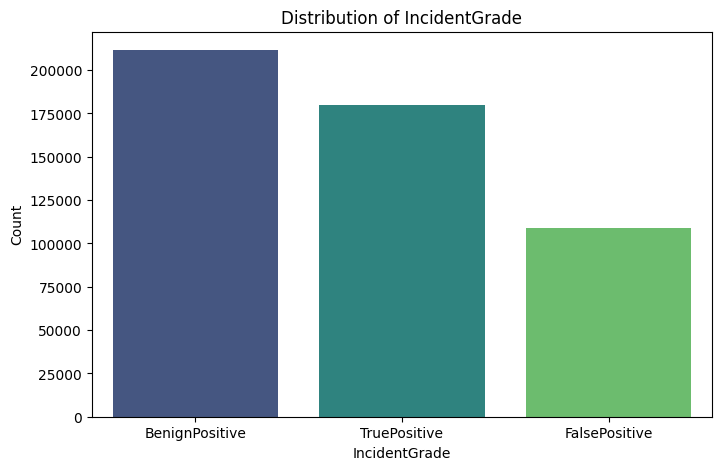

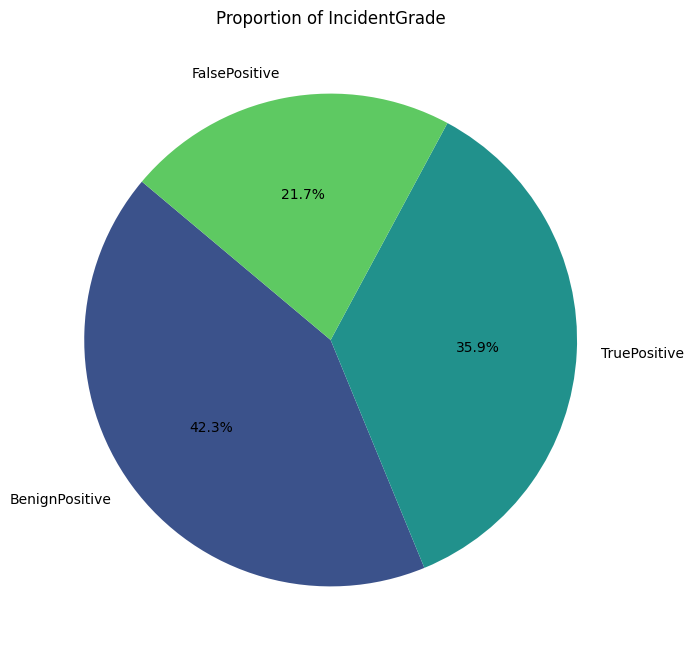

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of 'IncidentGrade' values
incident_counts = df['IncidentGrade'].value_counts()

# 1. Bar Chart for 'IncidentGrade' Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=incident_counts.index, y=incident_counts.values, palette='viridis')
plt.title('Distribution of IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

# 2. Pie Chart for 'IncidentGrade' Proportion
plt.figure(figsize=(8, 8))
plt.pie(incident_counts, labels=incident_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(incident_counts)))
plt.title('Proportion of IncidentGrade')
plt.show()

In [27]:
# Step 1: Create the Location Hierarchy (CountryCode_State_City)
df['location'] = df['CountryCode'].astype(str) + '_' + df['State'].astype(str) + '_' + df['City'].astype(str)

# Step 2: Calculate the proportions for each class in each location
location_severity = df.groupby('location')['IncidentGrade'].value_counts(normalize=True).unstack(fill_value=0)

# Step 3: Map these proportions to the original dataframe
df[['Loc_TruePositiveProportion', 'Loc_FalsePositiveProportion', 'Loc_BenignPositiveProportion']] = df['location'].apply(lambda x: location_severity.loc[x])

# Inverse class weights based on proportions
class_weights = {
    'TruePositive': 2.87,
    'FalsePositive': 4.65,
    'BenignPositive': 2.29
}

df['location_risk_score'] = df['location'].apply(lambda x: sum(location_severity.loc[x] * [class_weights[col] for col in location_severity.columns]))

# Optional: Fill any missing values with 0 for locations that don't have a recorded incident grade distribution
df['location_risk_score'] = df['location_risk_score'].fillna(0)

In [28]:
df.columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'DeviceName', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'OAuthApplicationId',
       'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'hour',
       'day', 'weekday', 'month', 'year', 'is_weekend', 'is_business_hours',
       'time_period', 'AT_TruePositiveProportion',
       'AT_FalsePositiveProportion', 'AT_BenignPositiveProportion', 'location',
       'Loc_TruePositiveProportion', 'Loc_FalsePositiveProportion',
       'Loc_BenignPositiveProportion', 'location_risk_score'],
      dtype='object')

In [29]:
df.drop(columns=['CountryCode', 'State', 'City'], inplace=True)

In [30]:
# Create risk scores and proportions for IncidentGrade and SuspicionLevel for FileName and FolderPath
for col in ['FileName', 'FolderPath']:
    # Calculate proportions for each class in IncidentGrade and store in a DataFrame
    risk_scores = df.groupby(col)['IncidentGrade'].value_counts(normalize=True).unstack(fill_value=0)
    
    # Map each proportion to the original DataFrame for IncidentGrade classes
    df[[f'{col.lower()}_true_positive', f'{col.lower()}_false_positive', f'{col.lower()}_benign_positive']] = \
        df[col].apply(lambda x: risk_scores.reindex([x]).iloc[0][['TruePositive', 'FalsePositive', 'BenignPositive']].fillna(0))
    
    # Calculate proportions for SuspicionLevel and store in a DataFrame
    suspicion_rates = df.groupby(col)['SuspicionLevel'].value_counts(normalize=True).unstack(fill_value=0)
    
    # Map each proportion to the original DataFrame for SuspicionLevel levels
    df[[f'{col.lower()}_suspicious', f'{col.lower()}_incriminated', f'{col.lower()}_suspicion_unknown']] = \
        df[col].apply(lambda x: suspicion_rates.reindex([x]).iloc[0][['Suspicious', 'Incriminated', 'Unknown']].fillna(0))

# Calculate device risk metrics for IncidentGrade and SuspicionLevel
device_metrics = df.groupby('DeviceId').agg({
    'IncidentGrade': lambda x: x.value_counts(normalize=True).reindex(['TruePositive', 'FalsePositive', 'BenignPositive'], fill_value=0),
    'SuspicionLevel': lambda x: x.value_counts(normalize=True).reindex(['Suspicious', 'Incriminated', 'Unknown'], fill_value=0)
})

# Extract IncidentGrade proportions for each class and map them back to the DataFrame
df[['device_true_positive', 'device_false_positive', 'device_benign_positive']] = \
    df['DeviceId'].apply(lambda x: pd.Series(device_metrics['IncidentGrade'].loc[x]).fillna(0))

# Extract SuspicionLevel proportions for each level and map them back to the DataFrame
df[['device_suspicious', 'device_incriminated', 'device_suspicion_unknown']] = \
    df['DeviceId'].apply(lambda x: pd.Series(device_metrics['SuspicionLevel'].loc[x]).fillna(0))

# Fill any remaining missing values (if any)
df.fillna({
    'device_true_positive': 0, 'device_false_positive': 0, 'device_benign_positive': 0,
    'device_suspicious': 0,  'device_incriminated': 0, 'device_suspicion_unknown': 0
}, inplace=True)


In [31]:
df.columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'DeviceName', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'OAuthApplicationId',
       'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion',
       'SuspicionLevel', 'LastVerdict', 'hour', 'day', 'weekday', 'month',
       'year', 'is_weekend', 'is_business_hours', 'time_period',
       'AT_TruePositiveProportion', 'AT_FalsePositiveProportion',
       'AT_BenignPositiveProportion', 'location', 'Loc_TruePositiveProportion',
       'Loc_FalsePositiveProportion', 'Loc_BenignPositiveProportion',
       'location_risk_score', 'filename_true_positive',
       'filename_false_positive', 'filename_benign_positive',
       'filename_suspicious', 'filename_incriminated',
       'filename_suspicion_unknown', 'folderpath_true_positive',
       'folderpath_false_positive', 'folderpath_benign_positive',
       'folderpath_suspicious', 'folderpath_incrim

In [32]:
df.head()

,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,DeviceName,RegistryKey,RegistryValueName,RegistryValueData,...,folderpath_benign_positive,folderpath_suspicious,folderpath_incriminated,folderpath_suspicion_unknown,device_true_positive,device_false_positive,device_benign_positive,device_suspicious,device_incriminated,device_suspicion_unknown
617542,Exfiltration,BenignPositive,File,Impacted,98799,600,153085,1631,635,860,...,1.000000,0.000000,0.000000,1.000000,0.365468,0.2197,0.414832,0.131378,0.000087,0.868535
2871047,InitialAccess,BenignPositive,User,Impacted,98799,138268,153085,1631,635,860,...,0.394142,0.118360,0.000011,0.881629,0.365468,0.2197,0.414832,0.131378,0.000087,0.868535
3093569,CommandAndControl,BenignPositive,User,Impacted,98799,138268,153085,1631,635,860,...,0.394142,0.118360,0.000011,0.881629,0.365468,0.2197,0.414832,0.131378,0.000087,0.868535
1485979,SuspiciousActivity,BenignPositive,Process,Related,98799,2,153085,1631,635,860,...,0.785049,0.988877,0.000000,0.011123,0.365468,0.2197,0.414832,0.131378,0.000087,0.868535
877816,InitialAccess,TruePositive,Ip,Related,98799,138268,153085,1631,635,860,...,0.394142,0.118360,0.000011,0.881629,0.365468,0.2197,0.414832,0.131378,0.000087,0.868535


In [33]:
df.drop(columns=['DeviceId', 'DeviceName', 'FileName', 'FolderPath'], inplace=True)

In [34]:
df = pd.get_dummies(df, columns=['Category', 'OAuthApplicationId', 'OSFamily', 'SuspicionLevel', 'LastVerdict'])

In [35]:
df.columns

Index(['IncidentGrade', 'EntityType', 'EvidenceRole', 'Sha256', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationName',
       'ResourceIdName', 'OSVersion',
       ...
       'OSFamily_1', 'OSFamily_2', 'OSFamily_5', 'SuspicionLevel_Incriminated',
       'SuspicionLevel_Suspicious', 'SuspicionLevel_Unknown',
       'LastVerdict_Malicious', 'LastVerdict_No Verdict',
       'LastVerdict_NoThreatsFound', 'LastVerdict_Suspicious'],
      dtype='object', length=145)

In [36]:
import pandas as pd

# Sample grade_mapping dictionary
grade_mapping = {
    'FalsePositive': 0,   # Not a real threat
    'BenignPositive': 1,  # Real but not malicious
    'TruePositive': 2     # Real and malicious
}

# Apply grade_mapping to the 'IncidentGrade' column
df['IncidentGrade'] = df['IncidentGrade'].map(grade_mapping)

# Verify the transformation
print(df['IncidentGrade'].head())

617542     1
2871047    1
3093569    1
1485979    1
877816     2
Name: IncidentGrade, dtype: int64


In [37]:
import pandas as pd
import category_encoders as ce

# Ensure that `IncidentGrade` is in Series format
y = df['IncidentGrade']

# Instantiate the target encoder
target_encoder = ce.TargetEncoder(cols=['EntityType', 'OSVersion', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationName'])

# Fit and transform the columns with the target encoder using `y` as a Series
df_encoded = target_encoder.fit_transform(df, y)

# Assign the transformed columns back to the original `df`
for col in ['EntityType', 'OSVersion', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationName']:
    df[col] = df_encoded[col]

print(df)

         IncidentGrade  EntityType EvidenceRole  Sha256  RegistryKey  \
617542               1    0.948053     Impacted     600     1.143666   
2871047              1    1.245168     Impacted  138268     1.143666   
3093569              1    1.245168     Impacted  138268     1.143666   
1485979              1    1.036728      Related       2     1.143666   
877816               2    1.257172      Related  138268     1.143666   
...                ...         ...          ...     ...          ...   
3485348              1    0.713982     Impacted  138268     1.143666   
2170313              2    1.128996      Related  138268     1.143666   
1756493              1    0.928003      Related  138268     1.143666   
2212069              1    1.033248     Impacted  138268     1.143666   
453756               2    1.245168     Impacted  138268     1.143666   

         RegistryValueName  RegistryValueData  ApplicationName  \
617542            1.141972           1.142192         1.143788   
287

In [38]:
import category_encoders as ce

# Instantiate the BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['EvidenceRole'])

# Fit and transform the 'EvidenceRole' column
df_binary_encoded = binary_encoder.fit_transform(df)

# Assign the binary encoded columns back to the original DataFrame
df = pd.concat([df.drop(columns=['EvidenceRole']), df_binary_encoded], axis=1)

# Verify the transformation
print(df.head())

         IncidentGrade  EntityType  Sha256  RegistryKey  RegistryValueName  \
617542               1    0.948053     600     1.143666           1.141972   
2871047              1    1.245168  138268     1.143666           1.141972   
3093569              1    1.245168  138268     1.143666           1.141972   
1485979              1    1.036728       2     1.143666           1.141972   
877816               2    1.257172  138268     1.143666           1.141972   

         RegistryValueData  ApplicationName  ResourceIdName  OSVersion  hour  \
617542            1.142192         1.143788            3586   1.144947    13   
2871047           1.142192         1.143788            3586   1.144947    11   
3093569           1.142192         1.143788            3586   1.144947    14   
1485979           1.142192         1.143788            3586   1.144947    23   
877816            1.142192         1.143788            3586   1.144947     6   

         ...  OSFamily_1  OSFamily_2  OSFamily_5  

In [39]:
print(df['Sha256'].shape)

(499992, 2)


In [41]:
# If you only need the first 'Sha256' column
df = df.loc[:, ~df.columns.duplicated()]

In [42]:
# Assuming 'Sha256' or 'Sha256_combined' is now the single column to use
hash_counts = df['Sha256'].value_counts(normalize=True)
df['hash_frequency'] = df['Sha256'].map(hash_counts)

In [43]:
df.drop(columns='Sha256', inplace=True)

In [44]:
df.drop(columns='ResourceIdName', inplace=True)

In [45]:
df.columns

Index(['IncidentGrade', 'EntityType', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'OSVersion', 'hour', 'day',
       'weekday',
       ...
       'SuspicionLevel_Incriminated', 'SuspicionLevel_Suspicious',
       'SuspicionLevel_Unknown', 'LastVerdict_Malicious',
       'LastVerdict_No Verdict', 'LastVerdict_NoThreatsFound',
       'LastVerdict_Suspicious', 'EvidenceRole_0', 'EvidenceRole_1',
       'hash_frequency'],
      dtype='object', length=145)

In [46]:
# This will show the names of duplicated columns if any
duplicate_columns = df.columns[df.columns.duplicated()].tolist()

if duplicate_columns:
    print("Duplicated columns:", duplicate_columns)
else:
    print("No duplicated columns found.")


No duplicated columns found.


In [47]:
# Convert all True/False values to binary (1/0) for all columns in the DataFrame
df = df.replace({True: 1, False: 0})

# Verify the transformation
print(df.head())

<ipython-input-47-3976cb52db72>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


         IncidentGrade  EntityType  RegistryKey  RegistryValueName  \
617542               1    0.948053     1.143666           1.141972   
2871047              1    1.245168     1.143666           1.141972   
3093569              1    1.245168     1.143666           1.141972   
1485979              1    1.036728     1.143666           1.141972   
877816               2    1.257172     1.143666           1.141972   

         RegistryValueData  ApplicationName  OSVersion  hour  day  weekday  \
617542            1.142192         1.143788   1.144947    13    6        3   
2871047           1.142192         1.143788   1.144947    11    4        1   
3093569           1.142192         1.143788   1.144947    14   11        1   
1485979           1.142192         1.143788   1.144947    23    9        6   
877816            1.142192         1.143788   1.144947     6   10        0   

         ...  SuspicionLevel_Incriminated  SuspicionLevel_Suspicious  \
617542   ...                          

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499992 entries, 617542 to 453756
Columns: 145 entries, IncidentGrade to hash_frequency
dtypes: category(1), float64(32), int32(5), int64(106), object(1)
memory usage: 544.1+ MB


In [50]:
# Get columns with object data types
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the columns with object data types
print(object_columns)

['location']


In [51]:
# Select the columns of interest
columns_of_interest = ['location']

# Print samples from these columns
sample_data = df[columns_of_interest].sample(10)  # Adjust the number 10 to print more or fewer samples
print(sample_data)

               location
1355117  242_1445_10630
4051048  242_1445_10630
633399   242_1445_10630
1538192  242_1445_10630
1276771  242_1445_10630
4131087  242_1445_10630
2131054  242_1445_10630
1178859  242_1445_10630
1996761  242_1445_10630
574277   242_1445_10630


In [52]:
df.drop(columns='location', inplace=True)

In [53]:
grade_mapping = {
    'night': 0,   
    'morning': 1,  
    'afternoon': 2,
    'evening': 3 
}

# Apply grade_mapping to the 'time_period' column
df['time_period'] = df['time_period'].map(grade_mapping)

# Verify the transformation
print(df['time_period'].head())

617542     2
2871047    1
3093569    2
1485979    3
877816     0
Name: time_period, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [54]:
# Convert the 'time_period' column to integer type
df['time_period'] = df['time_period'].astype(int)

# Check the datatype to confirm
print(df['time_period'].dtype)

int64


In [55]:
df_feature = df.copy()
df_feature

,IncidentGrade,EntityType,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OSVersion,hour,day,weekday,...,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,SuspicionLevel_Unknown,LastVerdict_Malicious,LastVerdict_No Verdict,LastVerdict_NoThreatsFound,LastVerdict_Suspicious,EvidenceRole_0,EvidenceRole_1,hash_frequency
617542,1,0.948053,1.143666,1.141972,1.142192,1.143788,1.144947,13,6,3,...,0,0,1,0,1,0,0,0,1,0.000012
2871047,1,1.245168,1.143666,1.141972,1.142192,1.143788,1.144947,11,4,1,...,0,0,1,0,1,0,0,0,1,0.920557
3093569,1,1.245168,1.143666,1.141972,1.142192,1.143788,1.144947,14,11,1,...,0,1,0,0,0,0,1,0,1,0.920557
1485979,1,1.036728,1.143666,1.141972,1.142192,1.143788,1.144947,23,9,6,...,0,1,0,0,0,0,1,1,0,0.001756
877816,2,1.257172,1.143666,1.141972,1.142192,1.143788,1.144947,6,10,0,...,0,0,1,0,1,0,0,1,0,0.920557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485348,1,0.713982,1.143666,1.141972,1.142192,1.143788,1.144947,17,13,3,...,0,0,1,0,1,0,0,0,1,0.920557
2170313,2,1.128996,1.143666,1.141972,1.142192,1.143788,1.144947,3,12,2,...,0,0,1,0,0,0,1,1,0,0.920557
1756493,1,0.928003,1.143666,1.141972,1.142192,1.143788,1.144947,14,6,3,...,0,0,1,0,1,0,0,1,0,0.920557
2212069,1,1.033248,1.143666,1.141972,1.142192,1.143788,1.144947,17,3,0,...,0,0,1,0,1,0,0,0,1,0.920557


In [56]:
import pandas as pd

# Calculate correlation matrix for numerical columns
numeric_df = df_feature.select_dtypes(include='number')
correlation_matrix = numeric_df.corr().abs()  # Take absolute value for simplicity

# Find pairs of columns with correlation greater than 0.7 (excluding self-correlation)
high_corr_pairs = (
    correlation_matrix.where((correlation_matrix > 0.7) & (correlation_matrix < 1))
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
    .sort_values(by='Correlation', ascending=False)
)

print("Highly correlated column pairs with correlation greater than 0.7:")
print(high_corr_pairs)

Highly correlated column pairs with correlation greater than 0.7:
                        Feature1                     Feature2  Correlation
83                EvidenceRole_1               EvidenceRole_0     1.000000
82                EvidenceRole_0               EvidenceRole_1     1.000000
55      device_suspicion_unknown            device_suspicious     1.000000
47             device_suspicious     device_suspicion_unknown     1.000000
73        SuspicionLevel_Unknown    SuspicionLevel_Suspicious     0.999683
..                           ...                          ...          ...
42  folderpath_suspicion_unknown               hash_frequency     0.711021
37         folderpath_suspicious               hash_frequency     0.710546
84                hash_frequency        folderpath_suspicious     0.710546
11   AT_BenignPositiveProportion    AT_TruePositiveProportion     0.709961
10     AT_TruePositiveProportion  AT_BenignPositiveProportion     0.709961

[86 rows x 3 columns]


In [57]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Assuming 'target' is your target variable
# Encode target if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(df_feature['IncidentGrade'])

# Calculate MI scores for categorical features
mi_scores = mutual_info_classif(df_feature.select_dtypes(include='number'), y_encoded)

# Create a DataFrame to show scores per feature
mi_df = pd.DataFrame({'Feature': df_feature.select_dtypes(include='number').columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display top features by MI Score
print("Top Features by Mutual Information:")
print(mi_df)

Top Features by Mutual Information:
                         Feature  MI Score
0                  IncidentGrade  1.110710
15     AT_TruePositiveProportion  0.507837
16    AT_FalsePositiveProportion  0.460459
17   AT_BenignPositiveProportion  0.414562
1                     EntityType  0.126418
..                           ...       ...
120       OAuthApplicationId_606  0.000000
116       OAuthApplicationId_526  0.000000
118       OAuthApplicationId_573  0.000000
121       OAuthApplicationId_683  0.000000
139   LastVerdict_NoThreatsFound  0.000000

[144 rows x 2 columns]


In [58]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Now print the entire DataFrame of MI scores
print("Top Features by Mutual Information:")
print(mi_df)

Top Features by Mutual Information:
                          Feature  MI Score
0                   IncidentGrade  1.110710
15      AT_TruePositiveProportion  0.507837
16     AT_FalsePositiveProportion  0.460459
17    AT_BenignPositiveProportion  0.414562
1                      EntityType  0.126418
21            location_risk_score  0.111528
19    Loc_FalsePositiveProportion  0.108759
50         Category_InitialAccess  0.107826
24       filename_benign_positive  0.106642
23        filename_false_positive  0.104537
20   Loc_BenignPositiveProportion  0.095974
18     Loc_TruePositiveProportion  0.093745
22         filename_true_positive  0.086593
30     folderpath_benign_positive  0.083079
36         device_benign_positive  0.077979
29      folderpath_false_positive  0.077097
34           device_true_positive  0.071176
28       folderpath_true_positive  0.068362
27     filename_suspicion_unknown  0.067115
33   folderpath_suspicion_unknown  0.065139
138        LastVerdict_No Verdict  0.059

In [61]:
df.to_csv("to_test_fully_encocded.csv")